# **Image Clustering Using Convnets Transfer Learning and K-Means**

#### Observations :
Image Clustering using simple KMeans does'nt yield good results. Simply flattening the image and passing it to KMeans doesn't preseve image features.
Instead, Convolutional Neural Networks preserves important characteristics of an image, as its biologically inspired by the architecture that is present in human/animal brains.
Convolutional Neural Network layers detects pixels, edges, text, parts, objects in the image, thereby preserving all the important features of an image.
Here we are trying to cluster the images based on 

In [ ]:
import cv2
import os
import numpy as np
from keras.models import load_model, Model
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

In [19]:
def get_model(layer='fc2'):
    """Keras Model of the VGG16 network, with the output layer set to `layer`.
    The default layer is the second-to-last fully connected layer 'fc2' of
    shape (4096,).
    Parameters
    ----------
    layer : str
        which layer to extract (must be of shape (None, X)), e.g. 'fc2', 'fc1'
        or 'flatten'
    """
    # base_model.summary():
    #     ....
    #     block5_conv4 (Conv2D)        (None, 15, 15, 512)       2359808
    #     _________________________________________________________________
    #     block5_pool (MaxPooling2D)   (None, 7, 7, 512)         0
    #     _________________________________________________________________
    #     flatten (Flatten)            (None, 25088)             0
    #     _________________________________________________________________
    #     fc1 (Dense)                  (None, 4096)              102764544
    #     _________________________________________________________________
    #     fc2 (Dense)                  (None, 4096)              16781312
    #     _________________________________________________________________
    #     predictions (Dense)          (None, 1000)              4097000
    #
    base_model = VGG16(weights='imagenet', include_top=True)
    model = Model(inputs=base_model.input,
                outputs=base_model.get_layer(layer).output)
    return model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def get_files(path_to_files, size):
    fn_imgs = []
    files = [file for file in os.listdir(path_to_files)]
    for file in files:
        if file.endswith('.JPG') :
          img = cv2.resize(cv2.imread(path_to_files+file), size)
          fn_imgs.append([file, img])
    return dict(fn_imgs)

In [ ]:
def feature_vector(img_arr, model):
    if img_arr.shape[2] == 1:
      img_arr = img_arr.repeat(3, axis=2)

    # (1, 224, 224, 3)
    arr4d = np.expand_dims(img_arr, axis=0)  
    arr4d_pp = preprocess_input(arr4d)
    return model.predict(arr4d_pp)[0,:]

In [ ]:
def feature_vectors(imgs_dict, model):
    f_vect = {}
    for fn, img in imgs_dict.items():
      f_vect[fn] = feature_vector(img, model)
    return f_vect

In [ ]:
imgs_dict = get_files(path_to_files = '/content/drive/Othercomputers/Mon MacBook Pro/Documents/Code et projet/DOSSIER INDO/',size = (224, 224))

# Create Keras NN model.
model = get_model()

# Feed images through the model and extract feature vectors.
img_feature_vector = feature_vectors(imgs_dict, model)

553476096/553467096 [==============================] - 8s 0us/step


#### Elbow method to find Optimal K

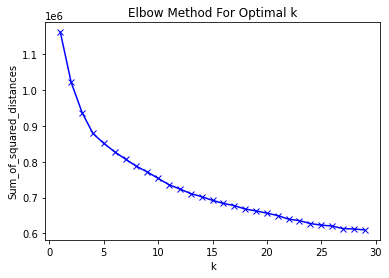

In [11]:
images = list(img_feature_vector.values())
fns = list(img_feature_vector.keys())
sum_of_squared_distances = []
K = range(1, 30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(images)
    sum_of_squared_distances.append(km.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [12]:
n_clusters_indo = 5

In [13]:
kmeans = KMeans(n_clusters=n_clusters_indo, init='k-means++')
kmeans.fit(images)
y_kmeans = kmeans.predict(images)
file_names = list(imgs_dict.keys())

In [14]:
cluster_path = '/content/drive/Othercomputers/Mon MacBook Pro/Documents/Code et projet/'
path_to_files = '/content/drive/Othercomputers/Mon MacBook Pro/Documents/Code et projet/DOSSIER INDO/'

for c in range(0,n_clusters_indo):
    if not os.path.exists(cluster_path+'cluster_'+str(c)):
        os.mkdir(cluster_path+'cluster_'+str(c))
    
for fn, cluster in zip(file_names, y_kmeans):
    image = cv2.imread(path_to_files+fn)
    cv2.imwrite(cluster_path+'cluster_'+str(cluster)+'/'+fn, image)

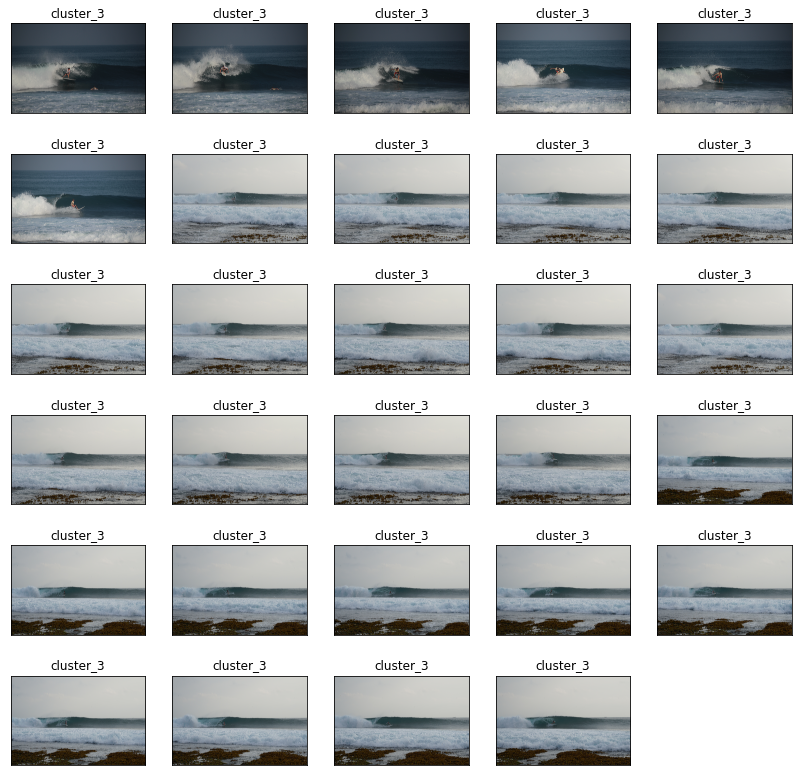

In [16]:
fig = plt.figure(figsize=(14, 14))

cluster_path = '/content/drive/Othercomputers/Mon MacBook Pro/Documents/Code et projet/cluster_3/'
images = [file for file in os.listdir(cluster_path)]

for cnt, data in enumerate(images[1:30]):
#     print(data)
    y = fig.add_subplot(6, 5, cnt+1)
    img = mpimg.imread(cluster_path+data)
    y.imshow(img)
    plt.title('cluster_3')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

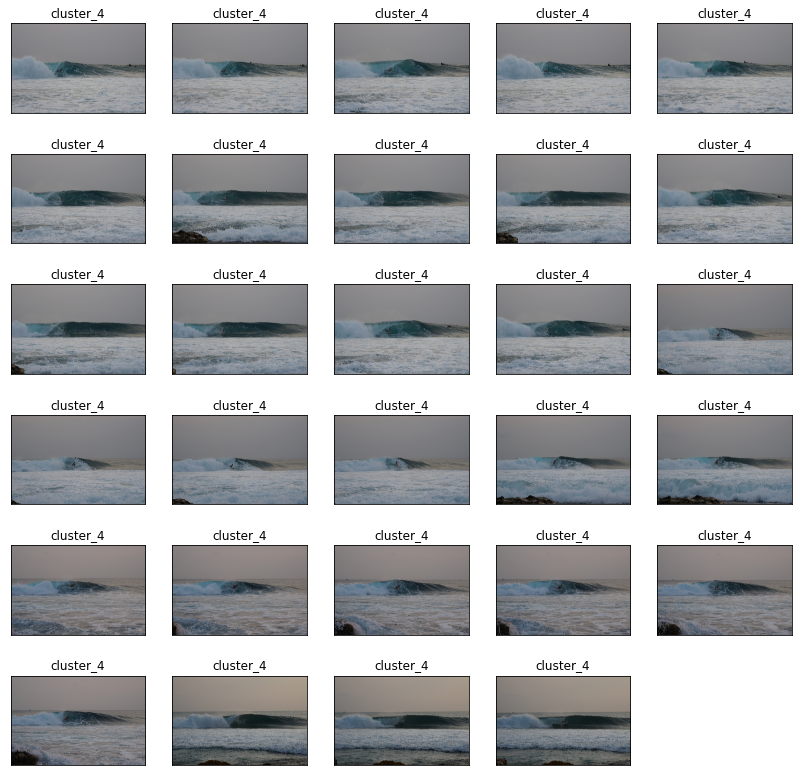

In [17]:
fig = plt.figure(figsize=(14, 14))

cluster_path = '/content/drive/Othercomputers/Mon MacBook Pro/Documents/Code et projet/cluster_4/'
images = [file for file in os.listdir(cluster_path)]

for cnt, data in enumerate(images[1:30]):
#     print(data)
    y = fig.add_subplot(6, 5, cnt+1)
    img = mpimg.imread(cluster_path+data)
    y.imshow(img)
    plt.title('cluster_4')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

In [21]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     